# Notebook to find Hashtag Doublets and Demultiplex multinucleated data using `HashSolo` after removing contamination using CellBender 0.01 Full Model

**Created by :** Srivalli Kolla

**Created on :** 28 March, 2025

**Modified on :** 28 March, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [4]:
import scanpy as sc
import pandas as pd
import datetime
import os
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [5]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300
plt.vlines

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython              3.0.12
PIL                 11.1.0
asttokens           NA
charset_normalizer  3.4.1
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython              3.0.12
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.12
decorator           5.2.1
executing           2.1.0
h5py                3.13.0
igraph              0.11.8
ipykernel           6.29.5
jedi                0.19.2
joblib              1.4.2
kiwisolver          1.4.7
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.44.0
matplotlib          3.10.1
mpl_toolkits        NA
natsort             8.4.0
numba               0.61.0
numpy               2.1.3
packaging           24.2
pandas              2.2.3
parso               0.8.4
patsy               1.0.1
platformdirs        4.3.6
prompt_toolkit      3.0.50
psutil              7.0.0
pure_eval           0.2.3
pydev_ipython       NA
pydevconso

# Importing files

In [6]:
raw_adata = sc.read_h5ad('../data/cellbender_processed_data/0.1_full/cb_0.1_full_with_hashtags_05_03_25.h5ad')
raw_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'assigned_hashtag'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'hto_counts'

In [7]:
raw_adata.obs

,assigned_hashtag
TACCCATTCGAACGCT-1,TotalSeqB7
TACTCATCACCAGGAC-1,TotalSeqB7
GCTGCGATCCGCCAGA-1,TotalSeqB3
TGCCGTTCATGAATGC-1,TotalSeqB7
ATCGTTGAGGATCTAT-1,TotalSeqB4
...,...
GTGCGGTCAATCCGTC-1,TotalSeqB1
GCCAATATCCCCTGAC-1,TotalSeqB1
GTCCTATTCGCGAATC-1,TotalSeqB1
AGTGATCCAAAGGTTC-1,TotalSeqB6


In [8]:
raw_adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,NA
Gm1992,ENSMUSG00000089699,Gene Expression,NA
Gm19938,ENSMUSG00000102331,Gene Expression,NA
Gm37381,ENSMUSG00000102343,Gene Expression,NA
Rp1,ENSMUSG00000025900,Gene Expression,NA
...,...,...,...
TotalSeqB5,Hash5,Antibody Capture,NA
TotalSeqB6,Hash6,Antibody Capture,NA
TotalSeqB7,Hash7,Antibody Capture,NA
TotalSeqB8,Hash8,Antibody Capture,NA


In [9]:
raw_adata.var['feature_types'].unique()

['Gene Expression', 'Antibody Capture']
Categories (2, object): ['Antibody Capture', 'Gene Expression']

# Adding Metadata

In [10]:
metadata = pd.read_csv('../data/Nuclei_hashing_metadata.csv', sep = ';')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,assigned_hashtag
0,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,Hash1
1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard,Hash9
2,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,Hash3
3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,Hash4
4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads,Hash5
5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,Hash6
6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,Hash7
7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard,Hash8


In [11]:
metadata = metadata.set_index('assigned_hashtag')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
assigned_hashtag,,,,,,,
Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
Hash9,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard
Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
Hash5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads
Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard
Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
Hash8,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard


Modifiying the assigned_hashtag names to match the metadata

In [12]:
raw_adata.obs['assigned_hashtag'] = raw_adata.obs['assigned_hashtag'].str.replace('TotalSeqB', 'Hash')
raw_adata.obs

,assigned_hashtag
TACCCATTCGAACGCT-1,Hash7
TACTCATCACCAGGAC-1,Hash7
GCTGCGATCCGCCAGA-1,Hash3
TGCCGTTCATGAATGC-1,Hash7
ATCGTTGAGGATCTAT-1,Hash4
...,...
GTGCGGTCAATCCGTC-1,Hash1
GCCAATATCCCCTGAC-1,Hash1
GTCCTATTCGCGAATC-1,Hash1
AGTGATCCAAAGGTTC-1,Hash6


In [13]:
raw_adata.obs = raw_adata.obs.join(metadata, on="assigned_hashtag", how="left")

raw_adata.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
TACCCATTCGAACGCT-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
TACTCATCACCAGGAC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
GCTGCGATCCGCCAGA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
TGCCGTTCATGAATGC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
ATCGTTGAGGATCTAT-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
GCCAATATCCCCTGAC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
GTCCTATTCGCGAATC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
AGTGATCCAAAGGTTC-1,Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard


# QC check

## Mt and Ribo Genes

In [14]:
raw_adata.var['mt'] = raw_adata.var_names.str.startswith('mt-') 
raw_adata.var['ribo'] = raw_adata.var_names.str.startswith(("Rps","Rpl"))
raw_adata.var

,gene_ids,feature_types,genome,mt,ribo
Xkr4,ENSMUSG00000051951,Gene Expression,NA,False,False
Gm1992,ENSMUSG00000089699,Gene Expression,NA,False,False
Gm19938,ENSMUSG00000102331,Gene Expression,NA,False,False
Gm37381,ENSMUSG00000102343,Gene Expression,NA,False,False
Rp1,ENSMUSG00000025900,Gene Expression,NA,False,False
...,...,...,...,...,...
TotalSeqB5,Hash5,Antibody Capture,NA,False,False
TotalSeqB6,Hash6,Antibody Capture,NA,False,False
TotalSeqB7,Hash7,Antibody Capture,NA,False,False
TotalSeqB8,Hash8,Antibody Capture,NA,False,False


In [15]:
ribo_counts = raw_adata.var['ribo'].value_counts()

mt_counts = raw_adata.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32192
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32280
True: 13


### Calculating QC metrics per cell

In [16]:
sc.pp.calculate_qc_metrics(raw_adata, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
raw_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'hto_counts'

### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

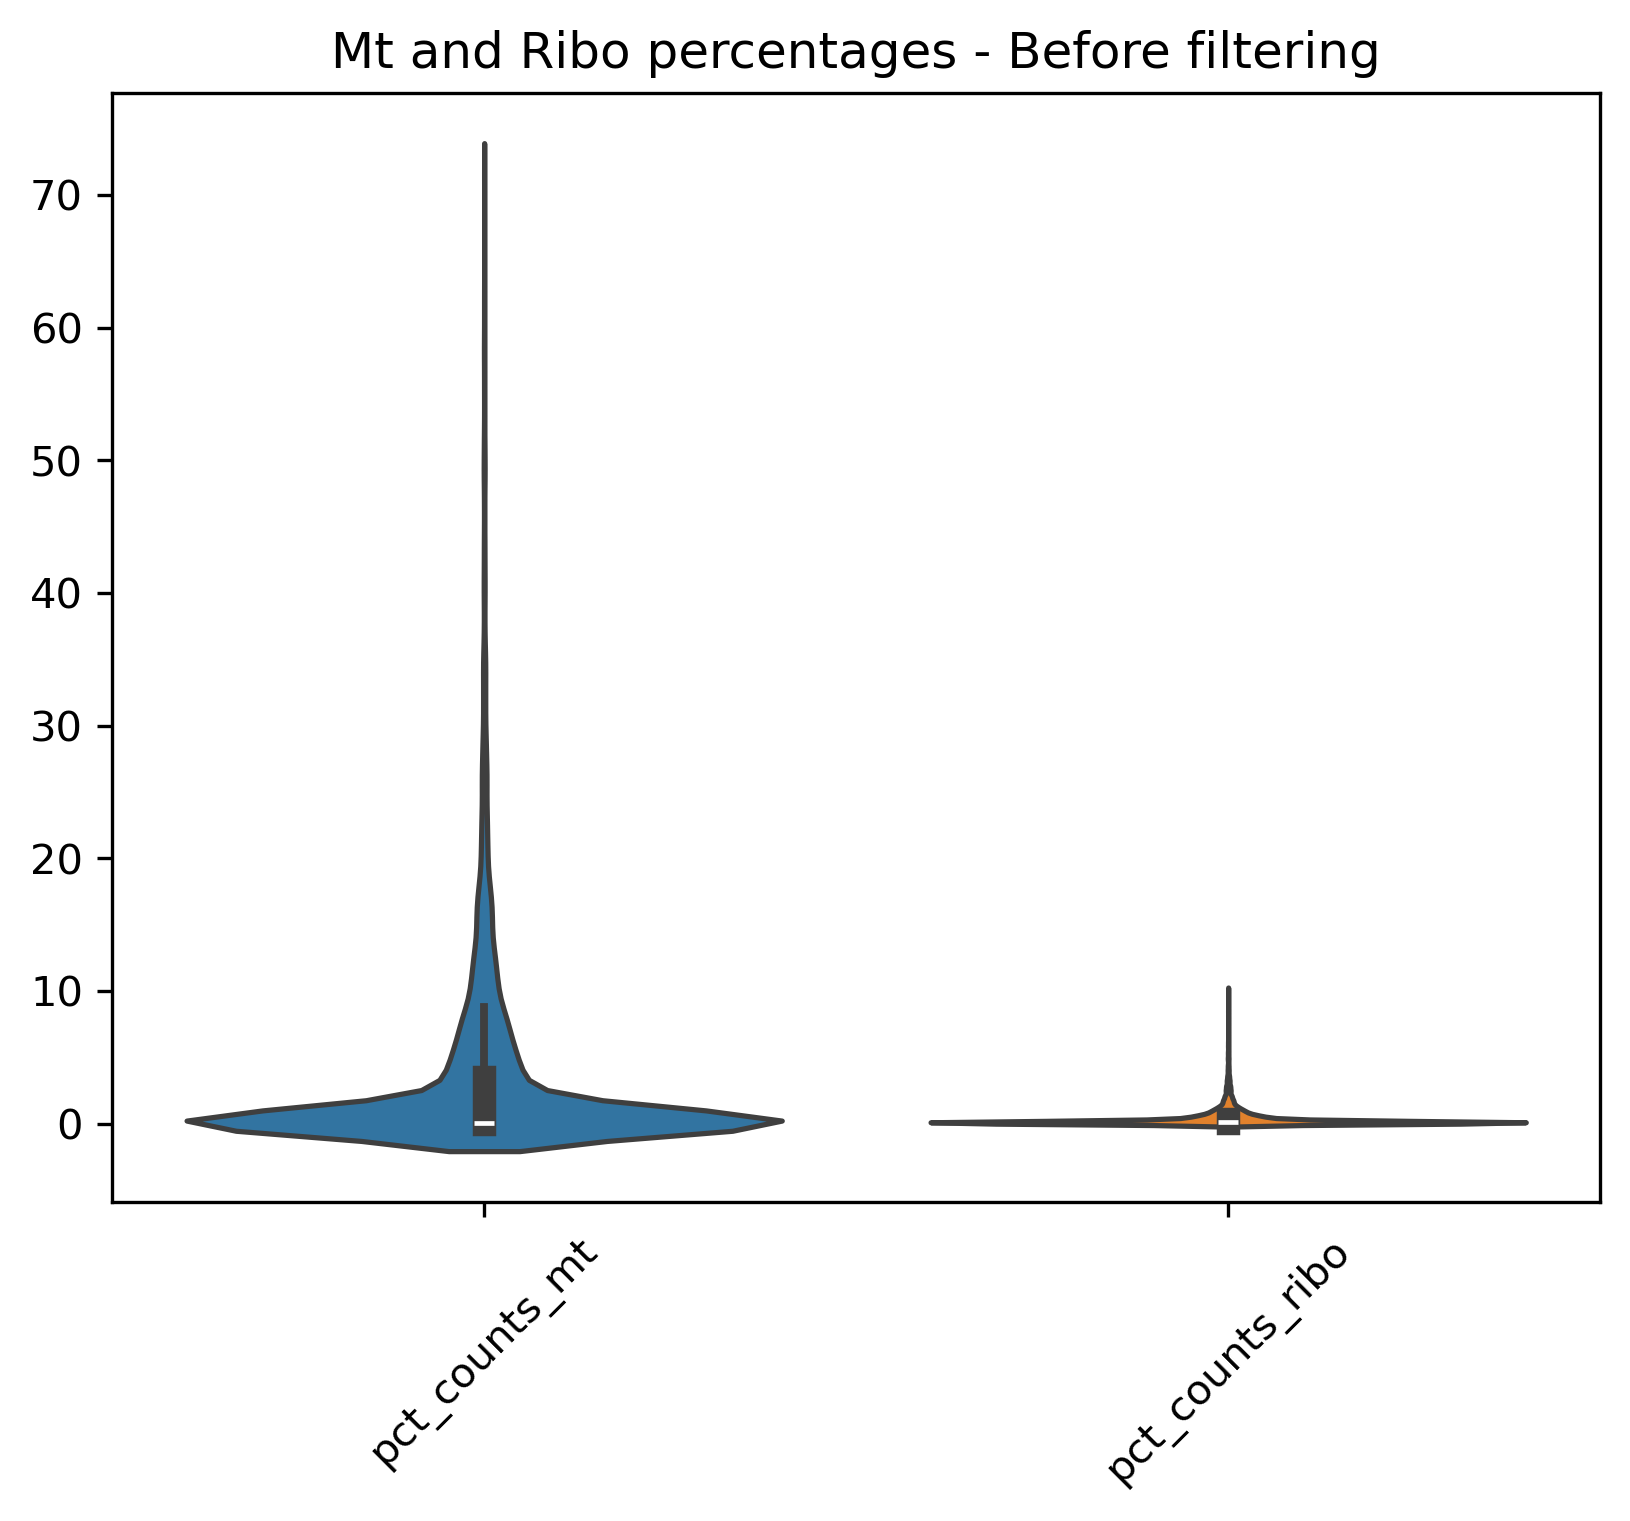

In [17]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=raw_adata.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

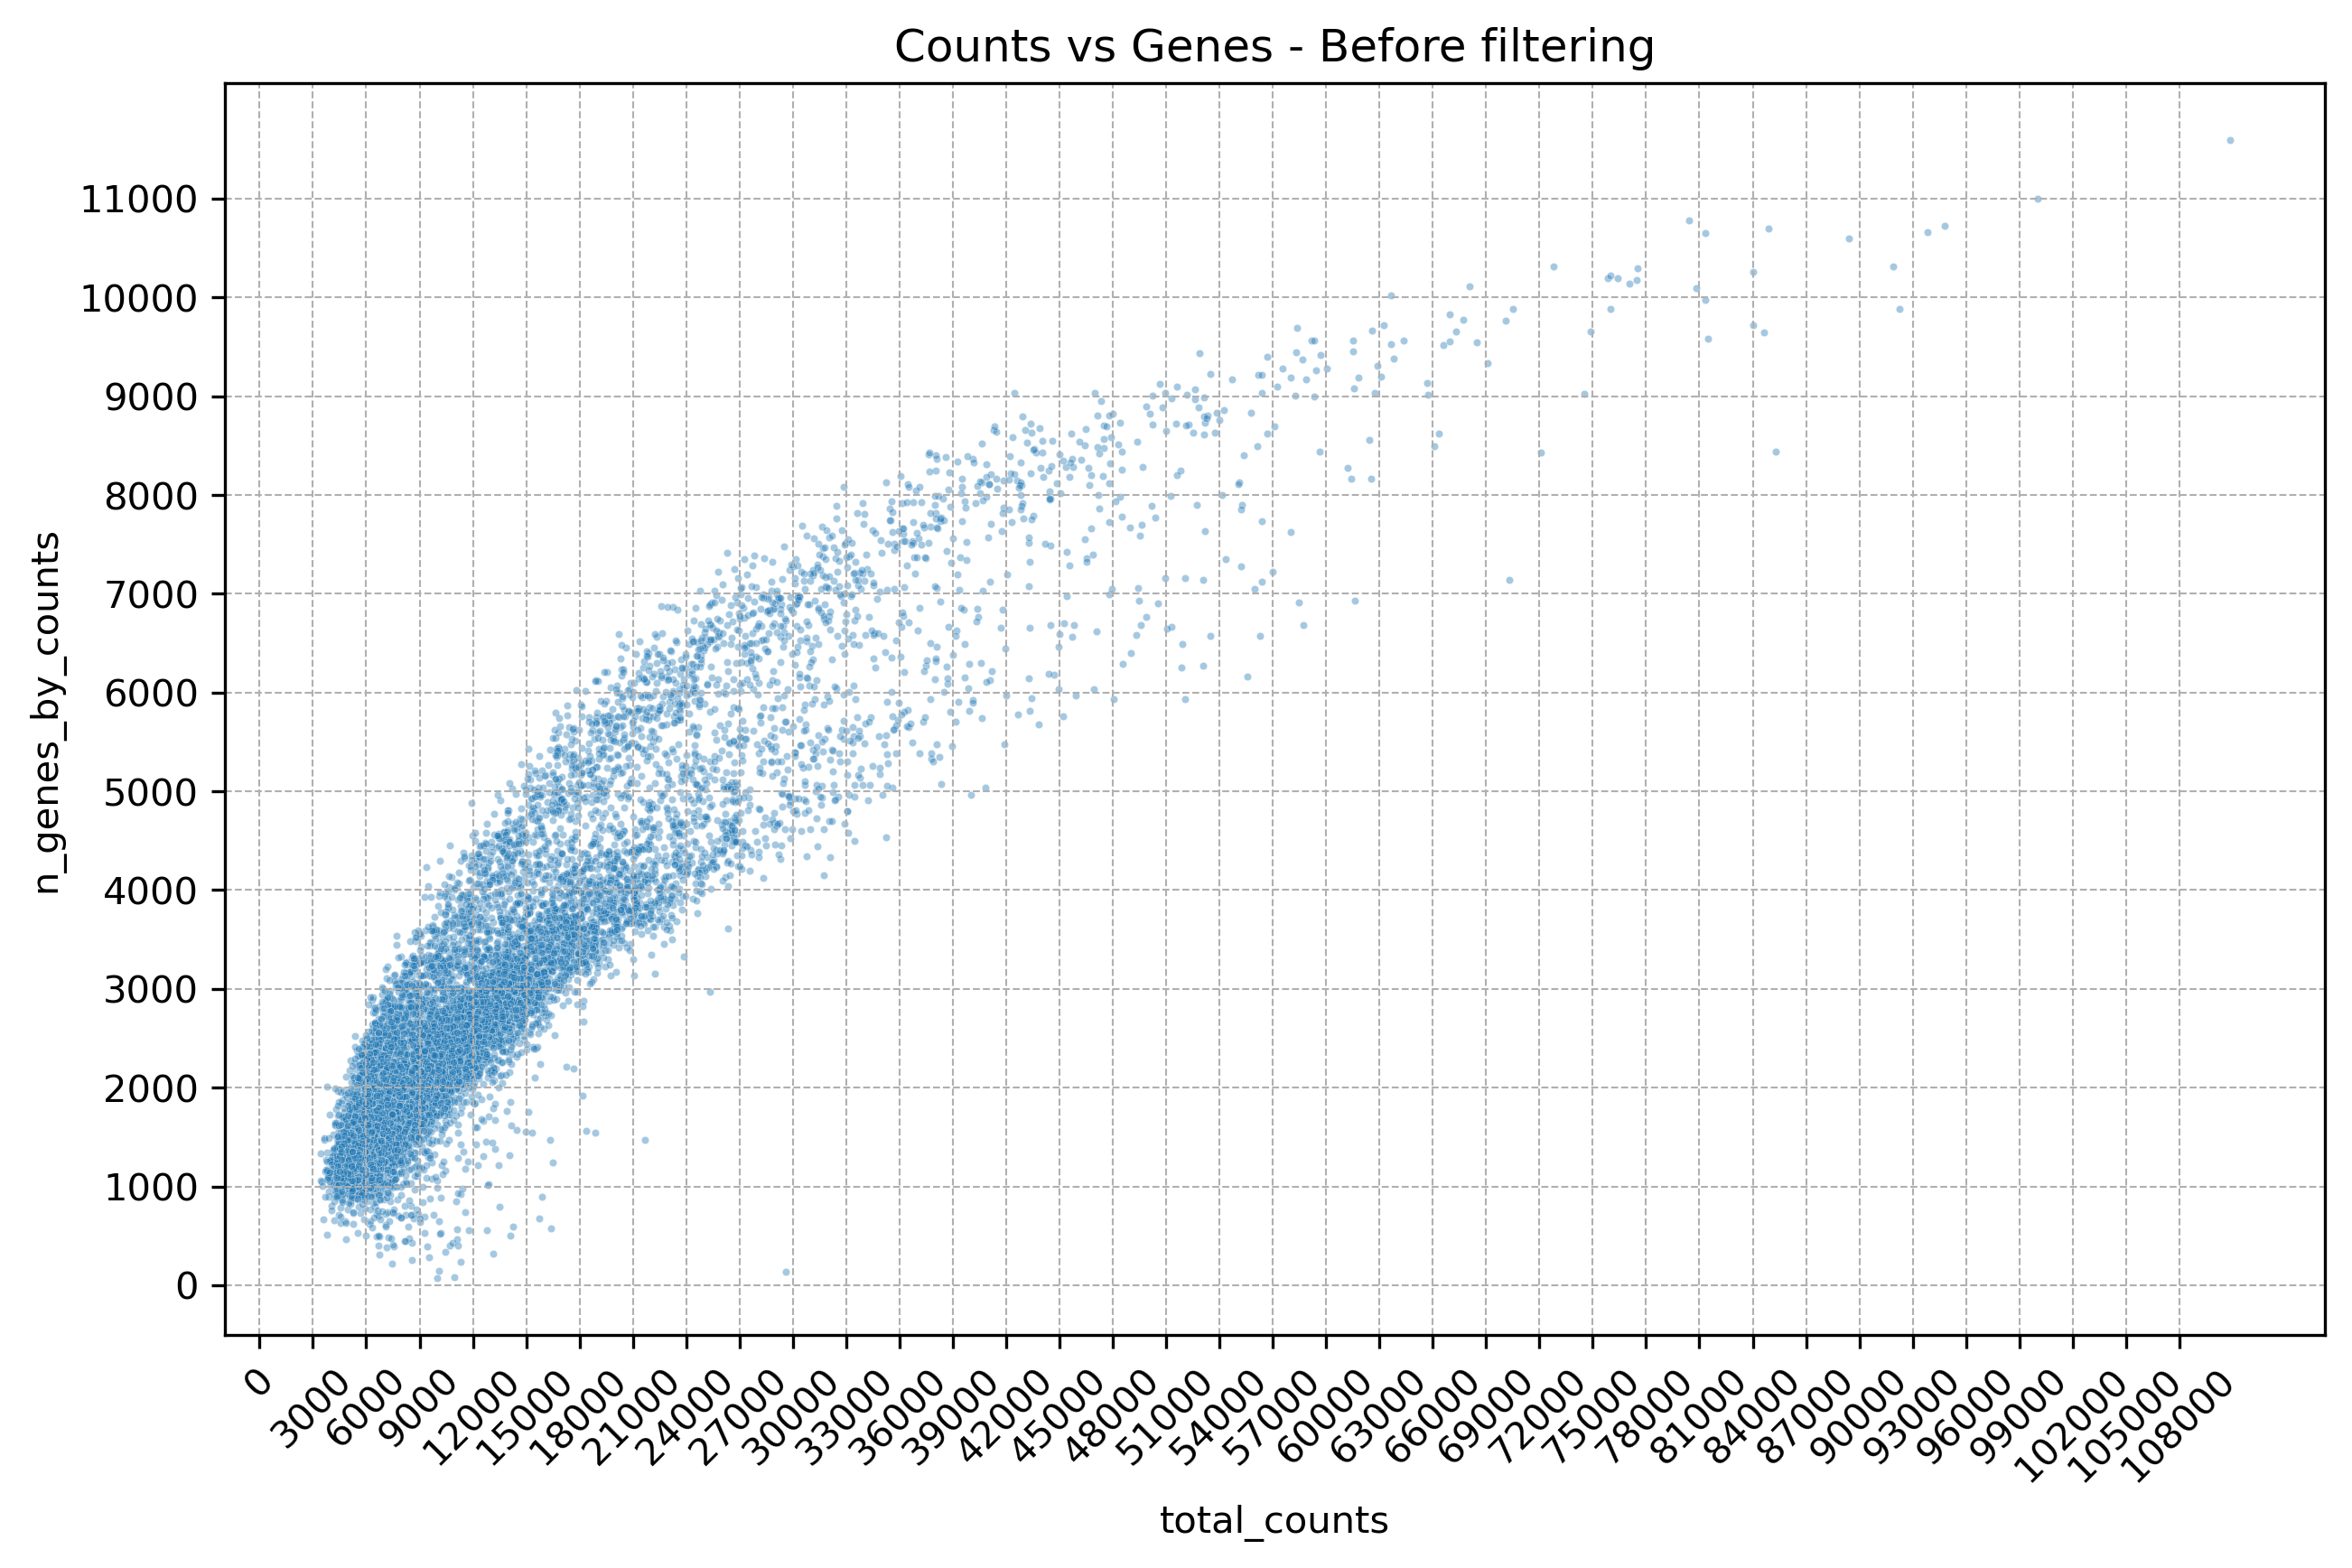

In [18]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=raw_adata.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
plt.xticks(range(0, int(max(raw_adata.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(raw_adata.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [19]:
filtered_object = raw_adata[raw_adata.obs['pct_counts_mt'] < 20]
filtered_object

View of AnnData object with n_obs × n_vars = 11146 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'hto_counts'

# Clustering

In [20]:
sc.pp.neighbors(filtered_object)
sc.tl.leiden(filtered_object)
filtered_object

computing neighbors
computing PCA
    with n_comps=50


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 32293 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


    finished (0:00:20)


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:52)
running Leiden clustering


/tmp/ipykernel_938316/3210525439.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(filtered_object)


    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


AnnData object with n_obs × n_vars = 11146 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Hashsolo

1. Convert hto_counts to a DataFrame
2. Add the HTO counts DataFrame as new columns in `obs`

In [21]:
hto_df = pd.DataFrame(filtered_object.obsm['hto_counts'], index=filtered_object.obs.index)
filtered_object.obs = filtered_object.obs.join(hto_df)
filtered_object.obs.head()

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,...,leiden,TotalSeqB1,TotalSeqB3,TotalSeqB4,TotalSeqB5,TotalSeqB6,TotalSeqB7,TotalSeqB8,TotalSeqB9,Assigned_Hashtag
TACCCATTCGAACGCT-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,11589,110836,...,6,0,0,365,0,0,1531,0,0,NaN
TACTCATCACCAGGAC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10998,100038,...,6,0,0,0,0,0,1318,0,0,NaN
GCTGCGATCCGCCAGA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,10727,94816,...,6,0,2356,0,0,0,0,0,0,NaN
TGCCGTTCATGAATGC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10665,93828,...,6,0,0,0,202,0,900,0,0,NaN
ATCGTTGAGGATCTAT-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,9880,92234,...,6,0,0,2619,0,0,0,0,0,NaN


In [22]:
sc.external.pp.hashsolo(
    filtered_object, 
    cell_hashing_columns=['TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 
                          'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9'],
    pre_existing_clusters= 'leiden' ,
    priors= (0.01, 0.8, 0.19)) ## Default prior probabilities of [negative, singlet, doublet]

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/external/pp/_hashsolo.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[cluster_feature_bool_vector, "cluster_feature"] = (


In [23]:
filtered_object

AnnData object with n_obs × n_vars = 11146 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [24]:
filtered_object.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,...,TotalSeqB7,TotalSeqB8,TotalSeqB9,Assigned_Hashtag,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
TACCCATTCGAACGCT-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,11589,110836,...,1531,0,0,NaN,2.0,6,4.259198e-23,9.633670e-09,1.000000e+00,Doublet
TACTCATCACCAGGAC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10998,100038,...,1318,0,0,NaN,1.0,6,6.846667e-07,8.450312e-01,1.549681e-01,TotalSeqB7
GCTGCGATCCGCCAGA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,10727,94816,...,0,0,0,NaN,1.0,6,1.439641e-07,8.450317e-01,1.549682e-01,TotalSeqB3
TGCCGTTCATGAATGC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10665,93828,...,900,0,0,NaN,2.0,6,5.511093e-21,2.095753e-07,9.999998e-01,Doublet
ATCGTTGAGGATCTAT-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,9880,92234,...,0,0,0,NaN,1.0,6,4.699118e-07,8.450314e-01,1.549681e-01,TotalSeqB4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,1148,4527,...,0,0,0,NaN,1.0,12,1.564214e-02,9.843579e-01,1.908096e-12,TotalSeqB1
GCCAATATCCCCTGAC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,1864,6118,...,0,0,0,NaN,1.0,15,3.498264e-02,9.650174e-01,7.332477e-09,TotalSeqB1
GTCCTATTCGCGAATC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,1838,5952,...,0,0,0,NaN,1.0,13,2.986361e-02,9.701364e-01,4.059541e-16,TotalSeqB1
AGTGATCCAAAGGTTC-1,Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,1202,5141,...,0,0,0,NaN,1.0,0,4.293135e-02,7.712819e-01,1.857867e-01,TotalSeqB6


In [25]:
filtered_object.obs['Classification'].value_counts()

Classification
TotalSeqB4    2648
TotalSeqB1    2367
Doublet       2171
TotalSeqB5    1525
TotalSeqB3     927
TotalSeqB7     884
TotalSeqB9     235
TotalSeqB6     196
TotalSeqB8     157
Negative        36
Name: count, dtype: int64

In [26]:
filtered_object.obs['leiden'].value_counts()

leiden
0     989
1     965
2     757
3     715
4     703
5     675
6     655
7     628
8     624
9     591
10    580
11    574
12    566
13    425
14    401
15    391
16    386
17    318
18    104
19     99
Name: count, dtype: int64

In [27]:
filtered_object.obs['cluster_feature'].value_counts()

cluster_feature
0     989
1     965
2     757
3     715
4     703
5     675
6     655
7     628
8     624
9     591
10    580
11    574
12    566
13    425
14    401
15    391
16    386
17    318
18    104
19     99
Name: count, dtype: int64

# Doublet and Negatives Check

In [28]:
doublets = filtered_object[filtered_object.obs['Classification'] == 'Doublet'].copy()
doublets

AnnData object with n_obs × n_vars = 2171 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [29]:
doublets.obs['Group'].value_counts()

Group
MCMV      1255
noninf     916
Name: count, dtype: int64

In [30]:
doublets.obs['Sample'].value_counts()

Sample
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13    448
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12    423
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14    280
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16    274
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17    196
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10    193
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11    191
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15    166
Name: count, dtype: int64

In [31]:
doublets.obs['Nuclei Purification Method after Hashing'].value_counts()

Nuclei Purification Method after Hashing
Magnetic Beads    1425
Standard           746
Name: count, dtype: int64

In [32]:
doublets.obs['leiden'].value_counts()

leiden
7     298
5     261
16    174
14    171
6     148
8     141
17    117
2      93
1      84
13     84
9      80
3      76
4      75
0      74
11     72
15     57
12     57
19     52
10     48
18      9
Name: count, dtype: int64

In [33]:
negatives = filtered_object[filtered_object.obs['Classification'] == 'Negative'].copy()
negatives

AnnData object with n_obs × n_vars = 36 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [34]:
negatives.obs['Group'].value_counts()

Group
MCMV      19
noninf    17
Name: count, dtype: int64

In [35]:
negatives.obs['Sample'].value_counts()

Sample
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13    12
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14    10
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16     7
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12     6
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10     1
Name: count, dtype: int64

In [36]:
negatives.obs['Nuclei Purification Method after Hashing'].value_counts()

Nuclei Purification Method after Hashing
Magnetic Beads    35
Standard           1
Name: count, dtype: int64

In [37]:
negatives.obs['leiden'].value_counts()

leiden
2     5
6     4
1     3
0     3
9     3
8     3
11    3
13    3
10    2
7     2
14    2
3     1
12    1
15    1
Name: count, dtype: int64

# Plotting

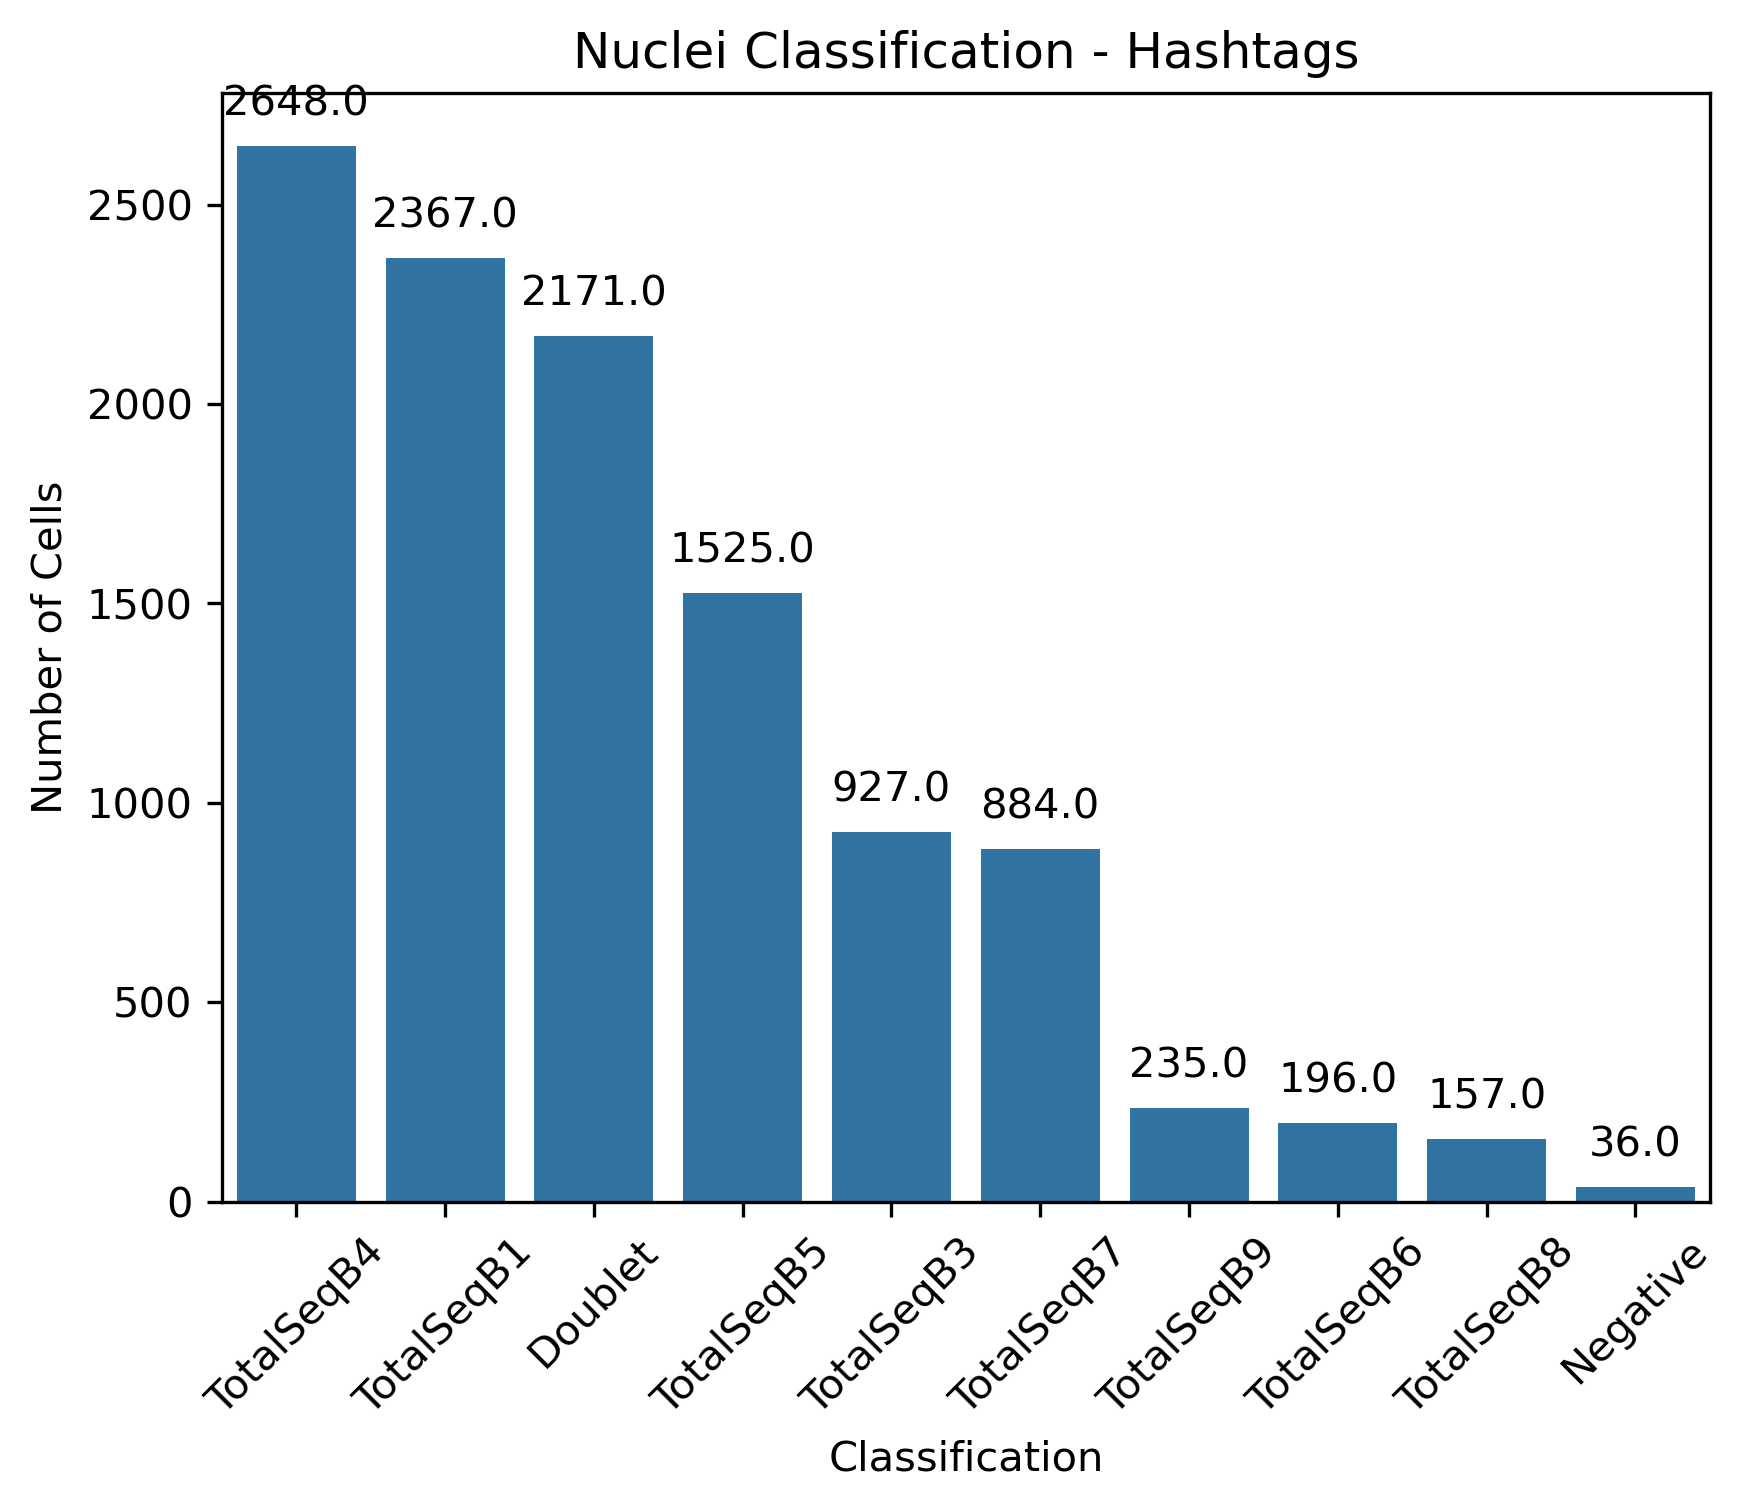

In [38]:
ax = sb.countplot(data=filtered_object.obs, x='Classification', order=filtered_object.obs['Classification'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

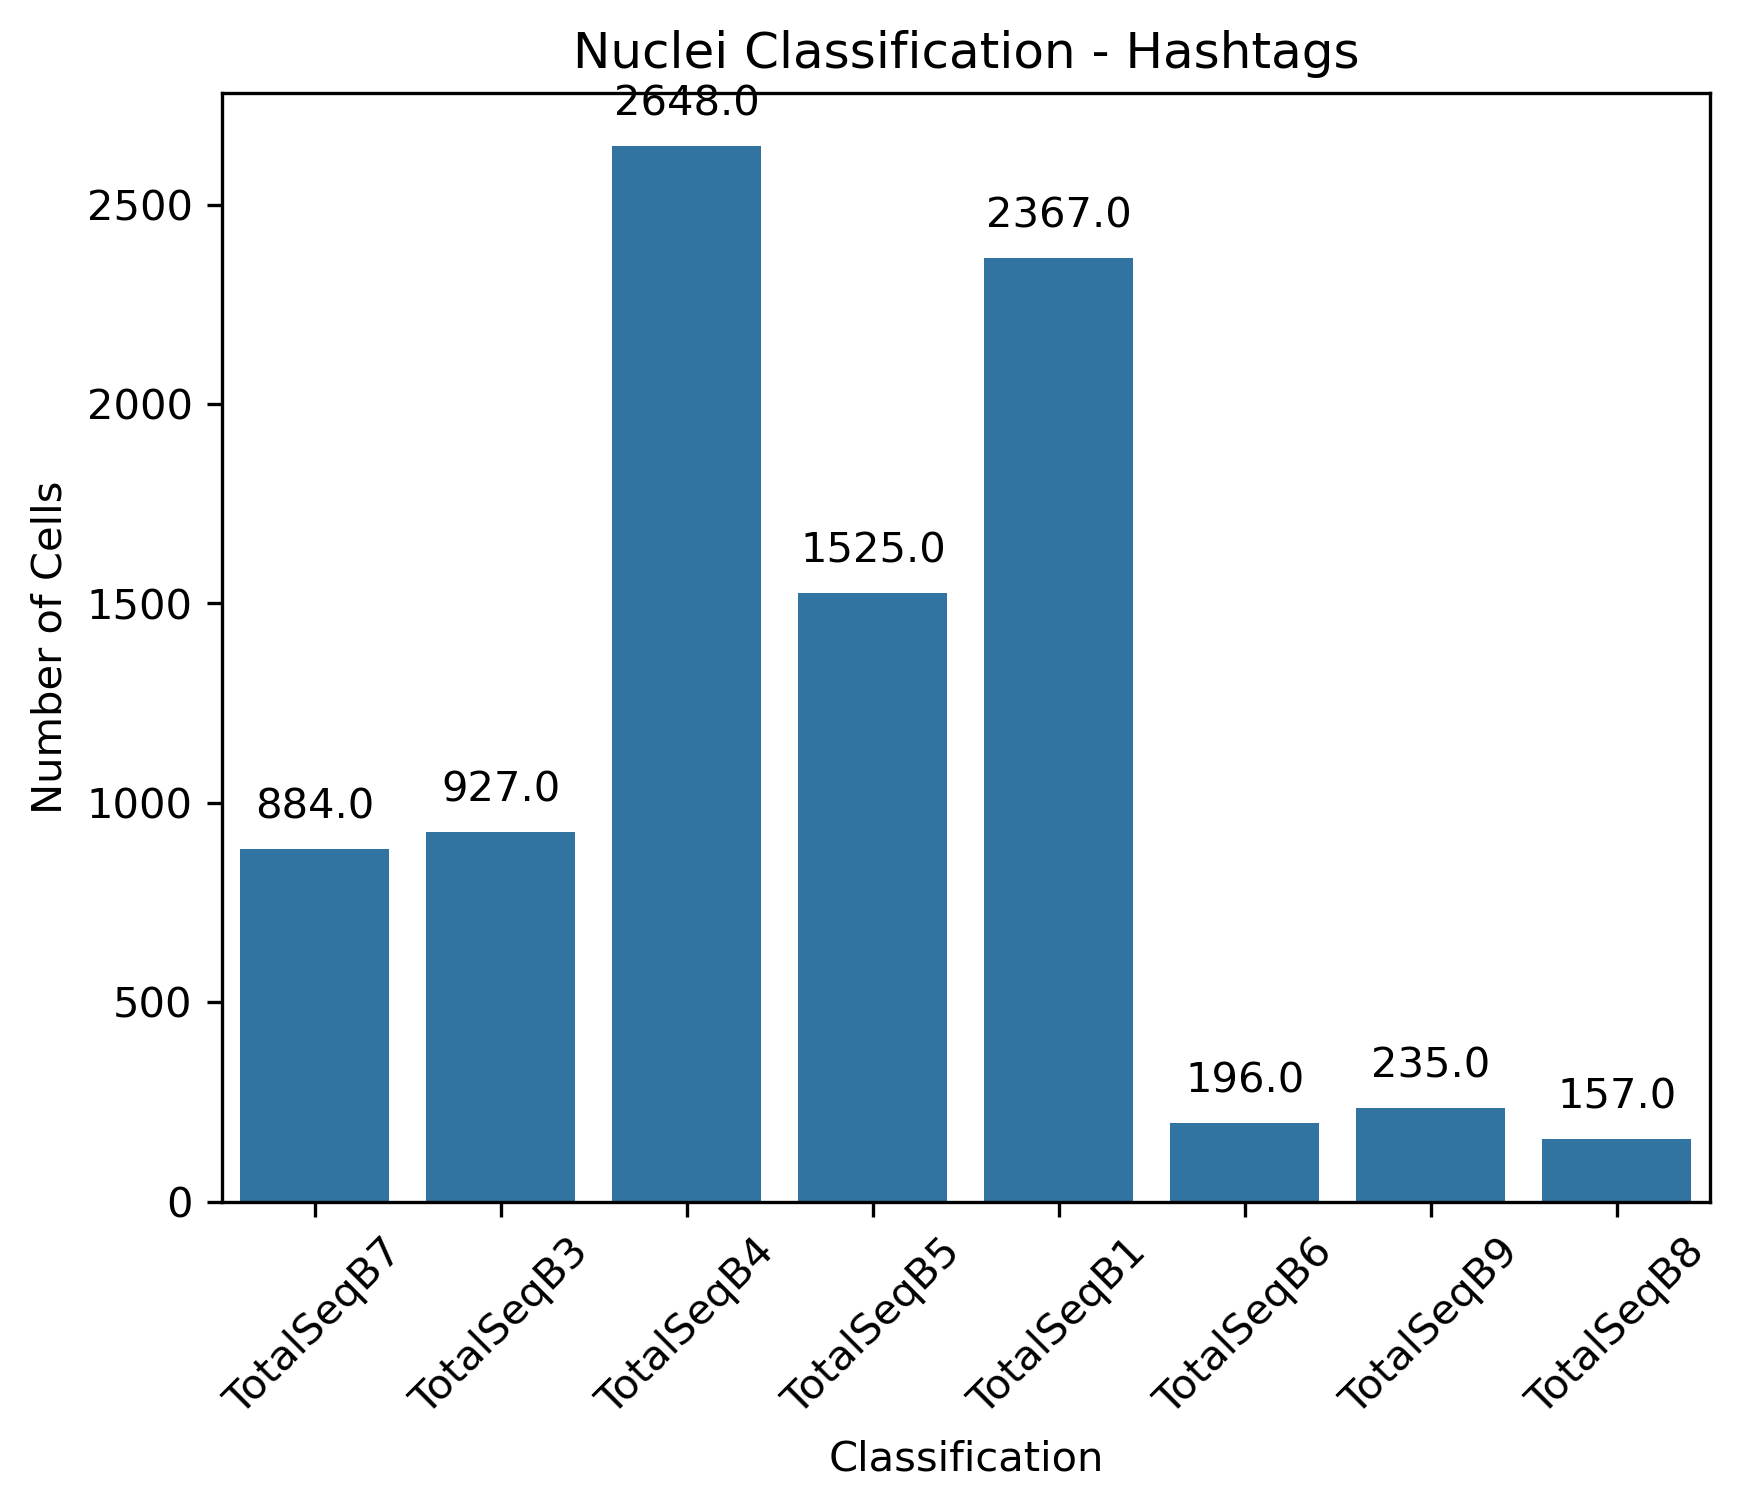

In [39]:
without_doublets = filtered_object[~filtered_object.obs['Classification'].isin(['Doublet', 'Negative'])]

ax = sb.countplot(data=without_doublets.obs, x='Classification')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45) 
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

In [40]:
mapping_dict = {
    "TotalSeqB1" : "Singlet" ,
    "TotalSeqB3" : "Singlet" ,
    "TotalSeqB4" : "Singlet" ,
    "TotalSeqB5" : "Singlet" ,
    "TotalSeqB6" : "Singlet" ,
    "TotalSeqB7" : "Singlet" ,
    "TotalSeqB8" : "Singlet" ,
    "TotalSeqB9" : "Singlet" ,
    "Doublet" : "Doublet" ,
    "Negative" : "Negative"
}

filtered_object.obs['Broad_Classification'] = filtered_object.obs['Classification'].replace(mapping_dict)
filtered_object.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,...,TotalSeqB8,TotalSeqB9,Assigned_Hashtag,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification,Broad_Classification
TACCCATTCGAACGCT-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,11589,110836,...,0,0,NaN,2.0,6,4.259198e-23,9.633670e-09,1.000000e+00,Doublet,Doublet
TACTCATCACCAGGAC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10998,100038,...,0,0,NaN,1.0,6,6.846667e-07,8.450312e-01,1.549681e-01,TotalSeqB7,Singlet
GCTGCGATCCGCCAGA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,10727,94816,...,0,0,NaN,1.0,6,1.439641e-07,8.450317e-01,1.549682e-01,TotalSeqB3,Singlet
TGCCGTTCATGAATGC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10665,93828,...,0,0,NaN,2.0,6,5.511093e-21,2.095753e-07,9.999998e-01,Doublet,Doublet
ATCGTTGAGGATCTAT-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,9880,92234,...,0,0,NaN,1.0,6,4.699118e-07,8.450314e-01,1.549681e-01,TotalSeqB4,Singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,1148,4527,...,0,0,NaN,1.0,12,1.564214e-02,9.843579e-01,1.908096e-12,TotalSeqB1,Singlet
GCCAATATCCCCTGAC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,1864,6118,...,0,0,NaN,1.0,15,3.498264e-02,9.650174e-01,7.332477e-09,TotalSeqB1,Singlet
GTCCTATTCGCGAATC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,1838,5952,...,0,0,NaN,1.0,13,2.986361e-02,9.701364e-01,4.059541e-16,TotalSeqB1,Singlet
AGTGATCCAAAGGTTC-1,Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,1202,5141,...,0,0,NaN,1.0,0,4.293135e-02,7.712819e-01,1.857867e-01,TotalSeqB6,Singlet


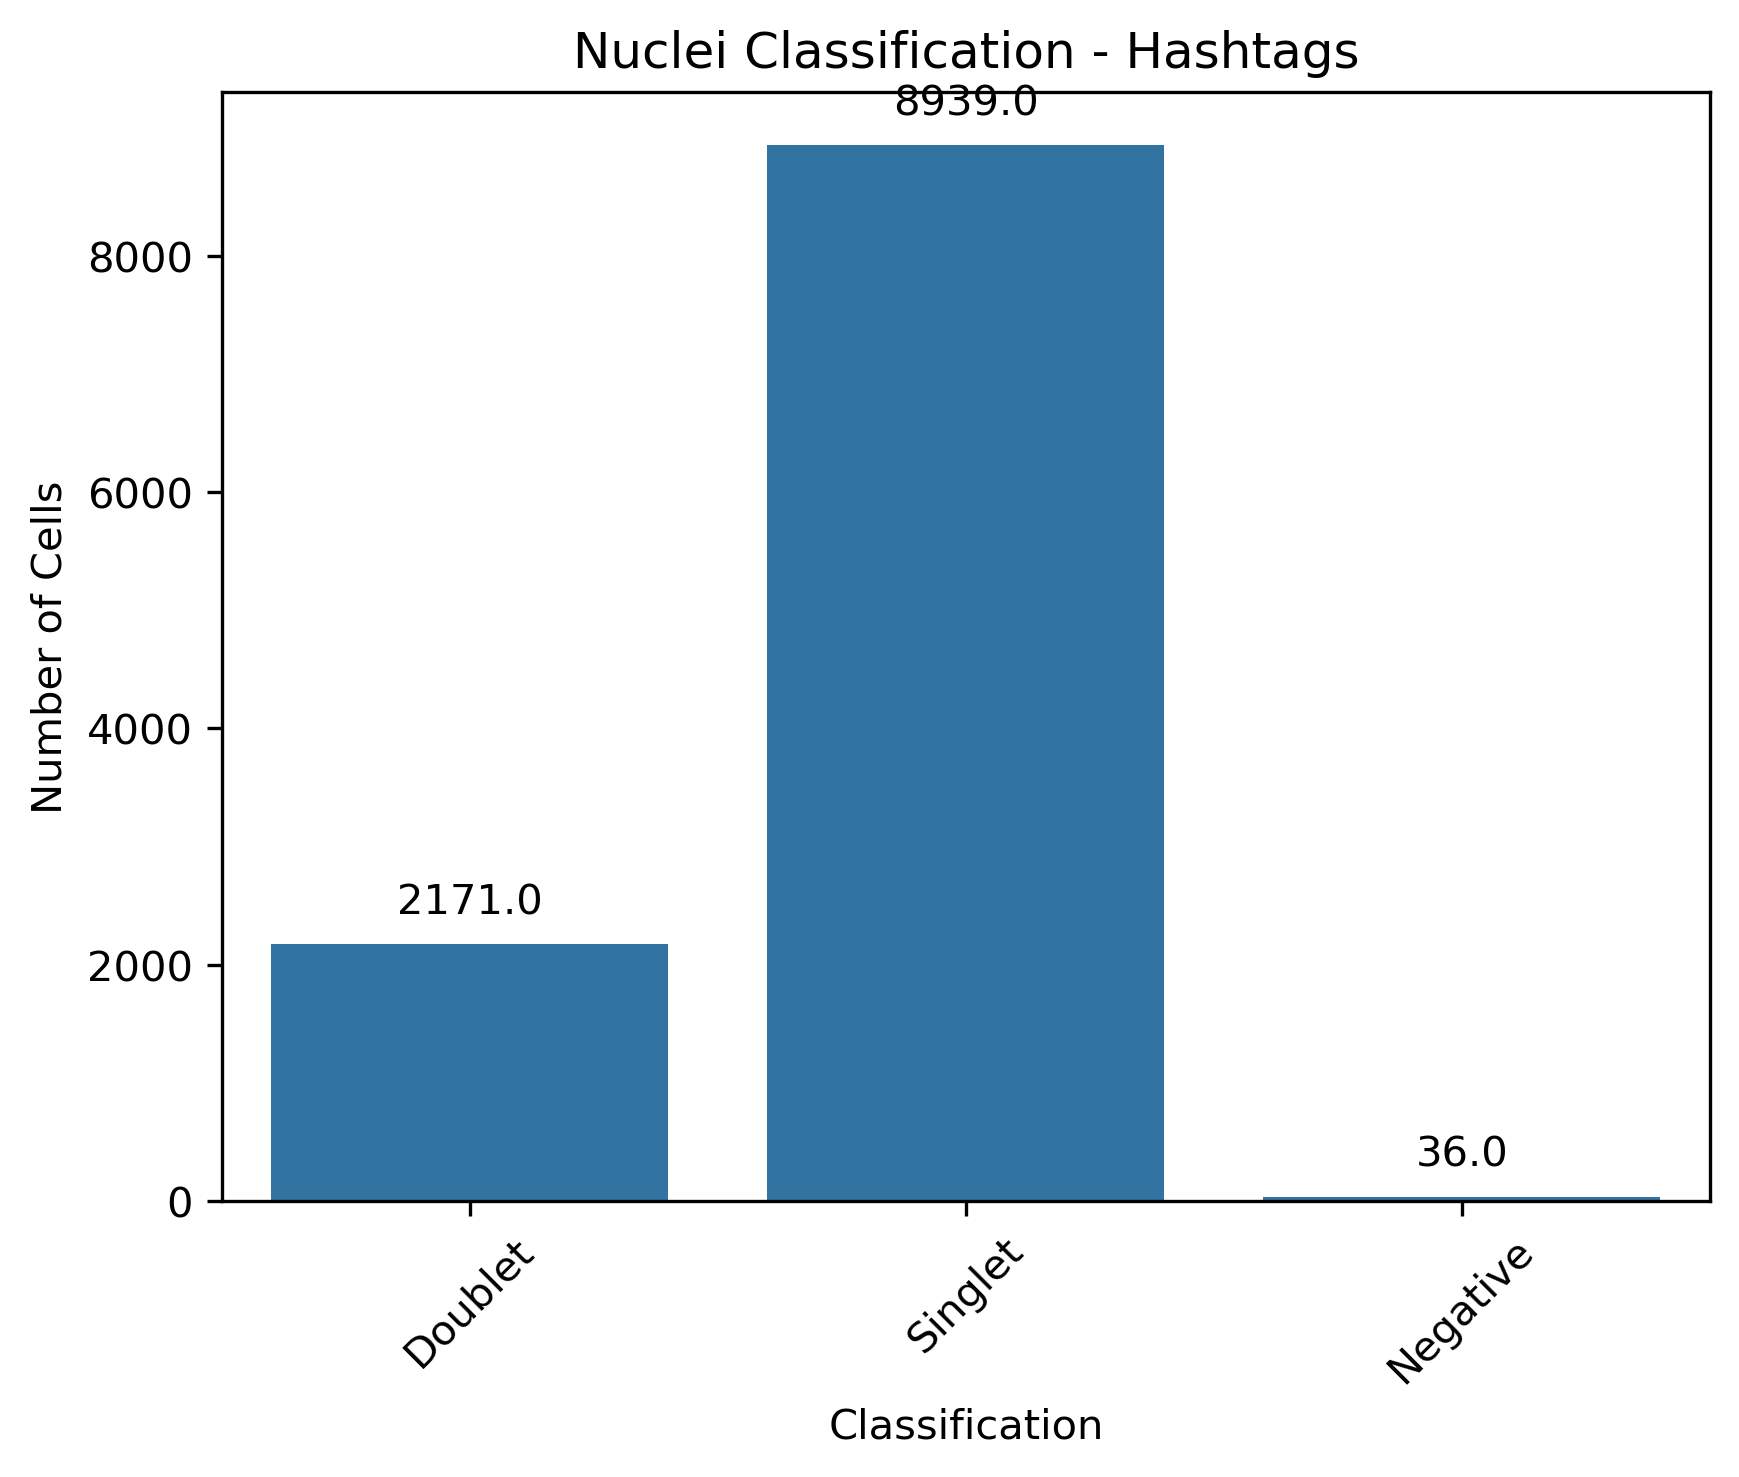

In [41]:
ax = sb.countplot(data=filtered_object.obs, x='Broad_Classification')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

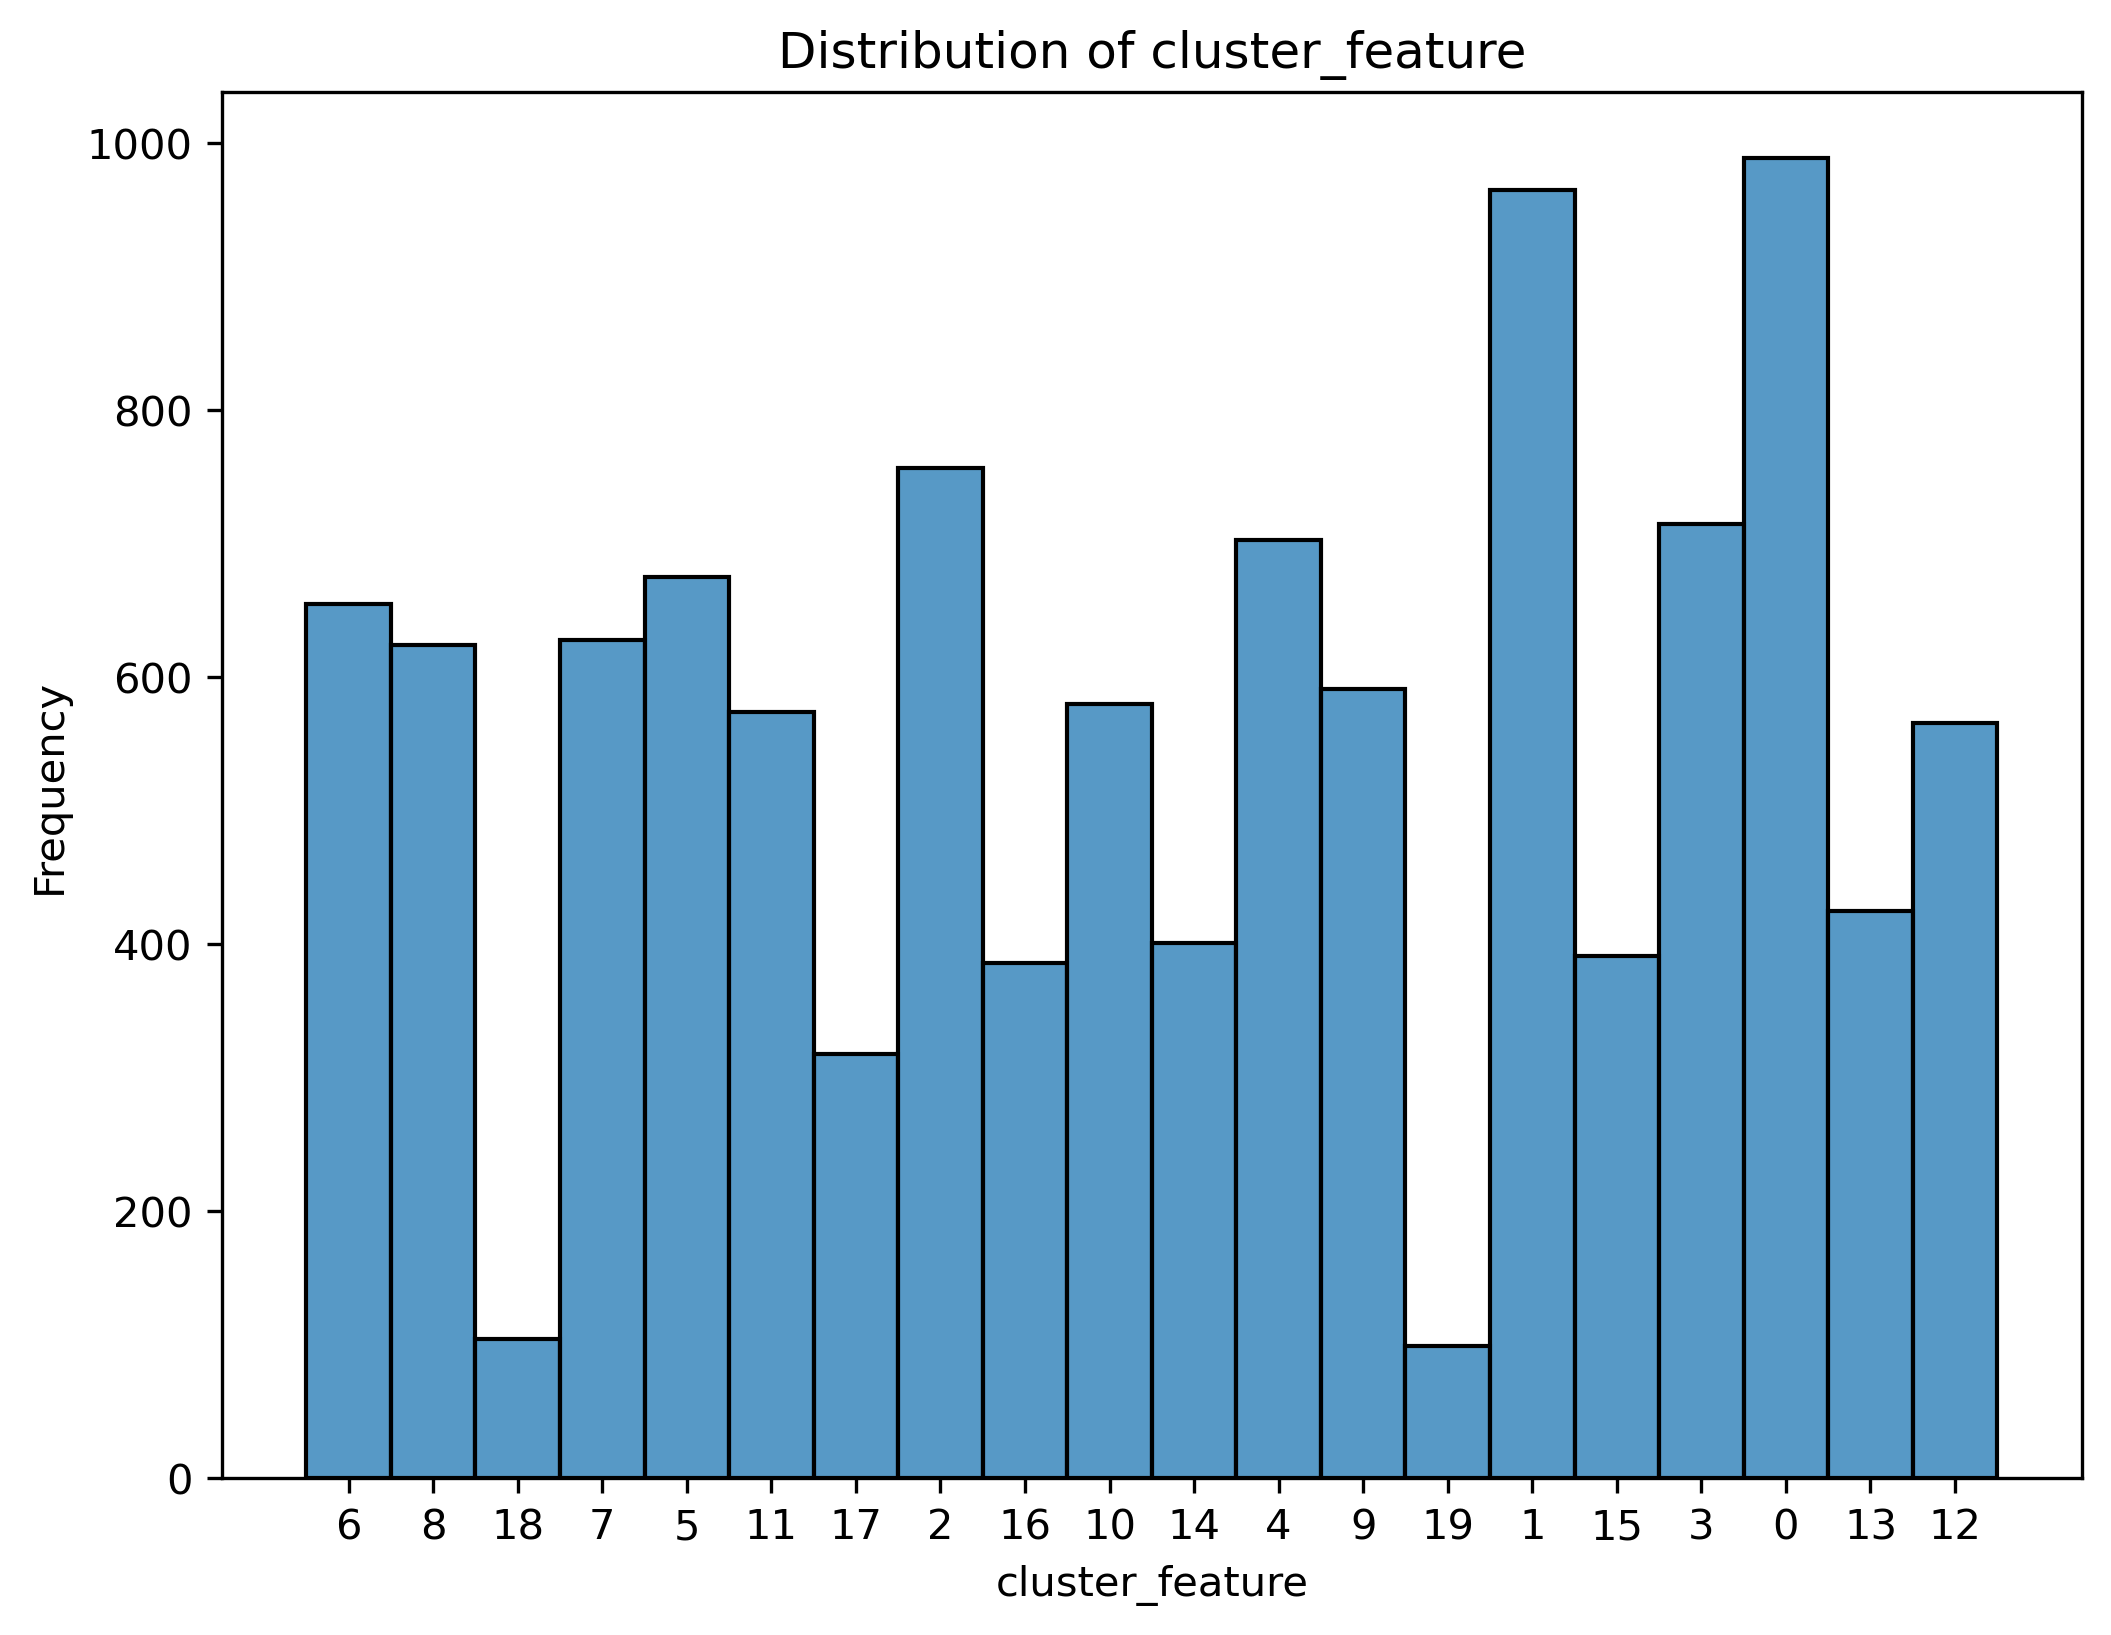

In [42]:
plt.figure(figsize=(8, 6))
sb.histplot(filtered_object.obs['cluster_feature'])
plt.title("Distribution of cluster_feature")
plt.xlabel("cluster_feature")
plt.ylabel("Frequency")
plt.show()

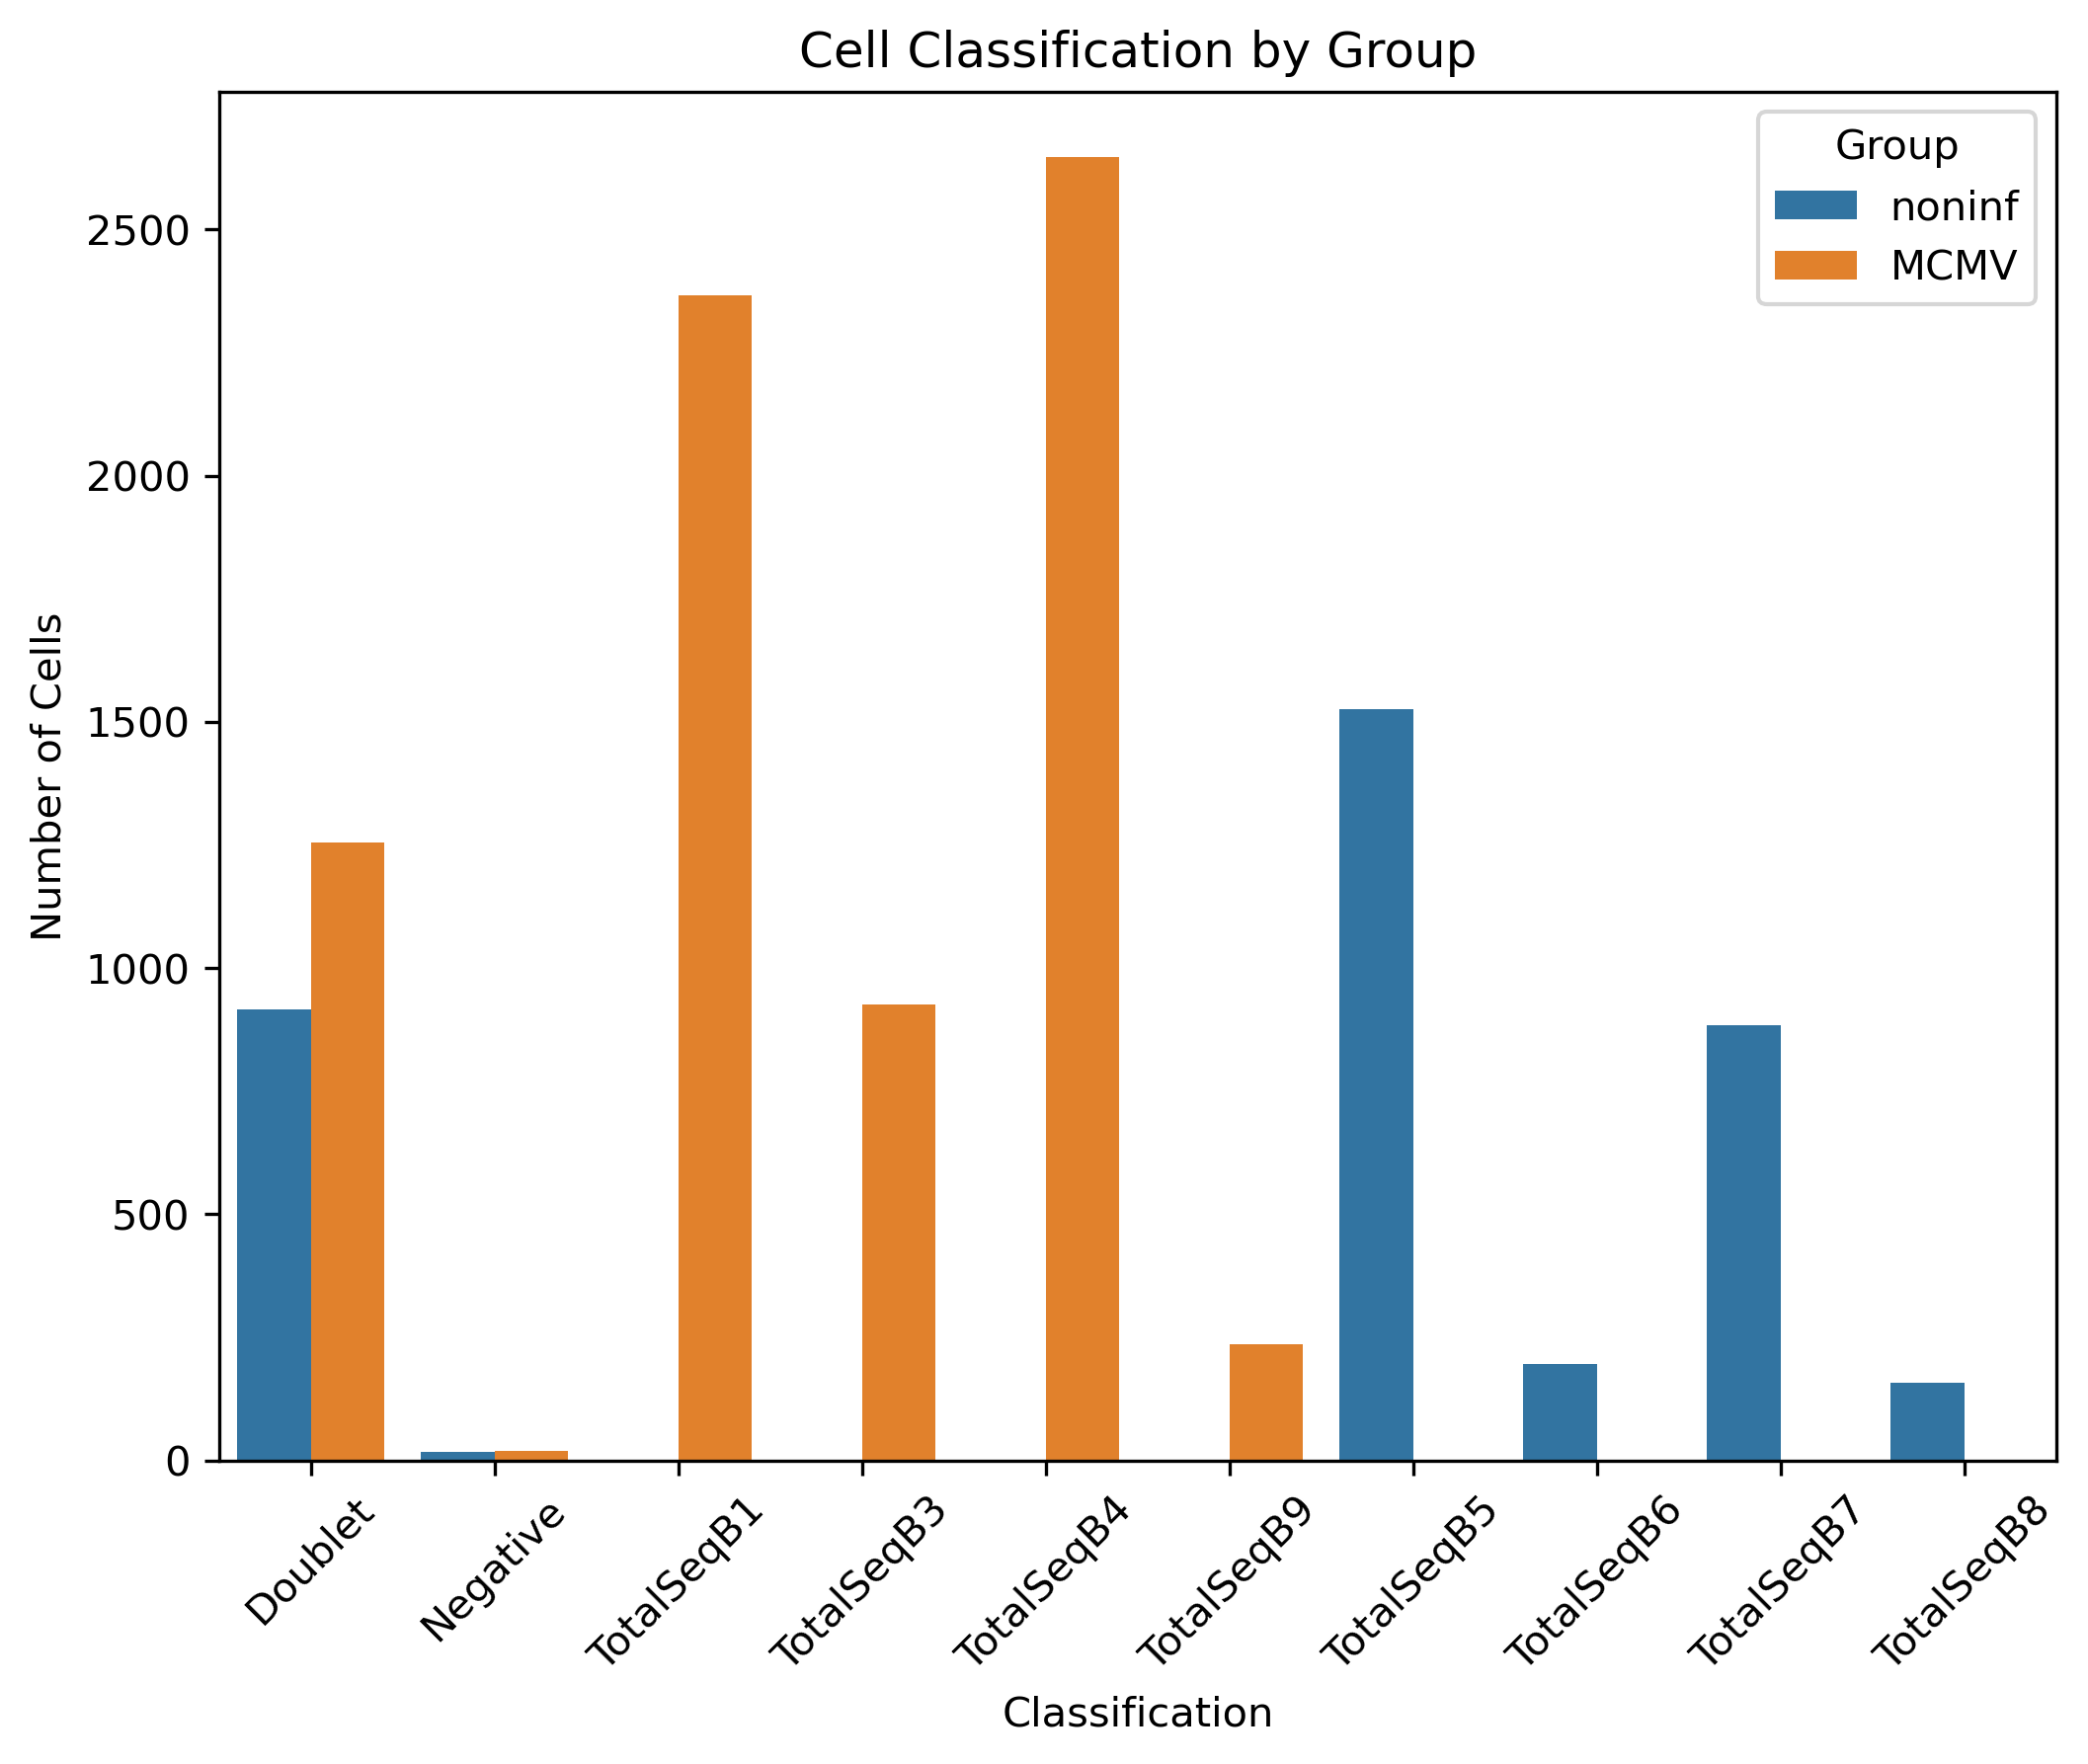

In [43]:
plt.figure(figsize=(8, 6))
sb.countplot(data=filtered_object.obs, x='Classification', hue='Group',order= ['Doublet','Negative', 'TotalSeqB1','TotalSeqB3','TotalSeqB4','TotalSeqB9','TotalSeqB5','TotalSeqB6','TotalSeqB7','TotalSeqB8'])
plt.title("Cell Classification by Group")
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

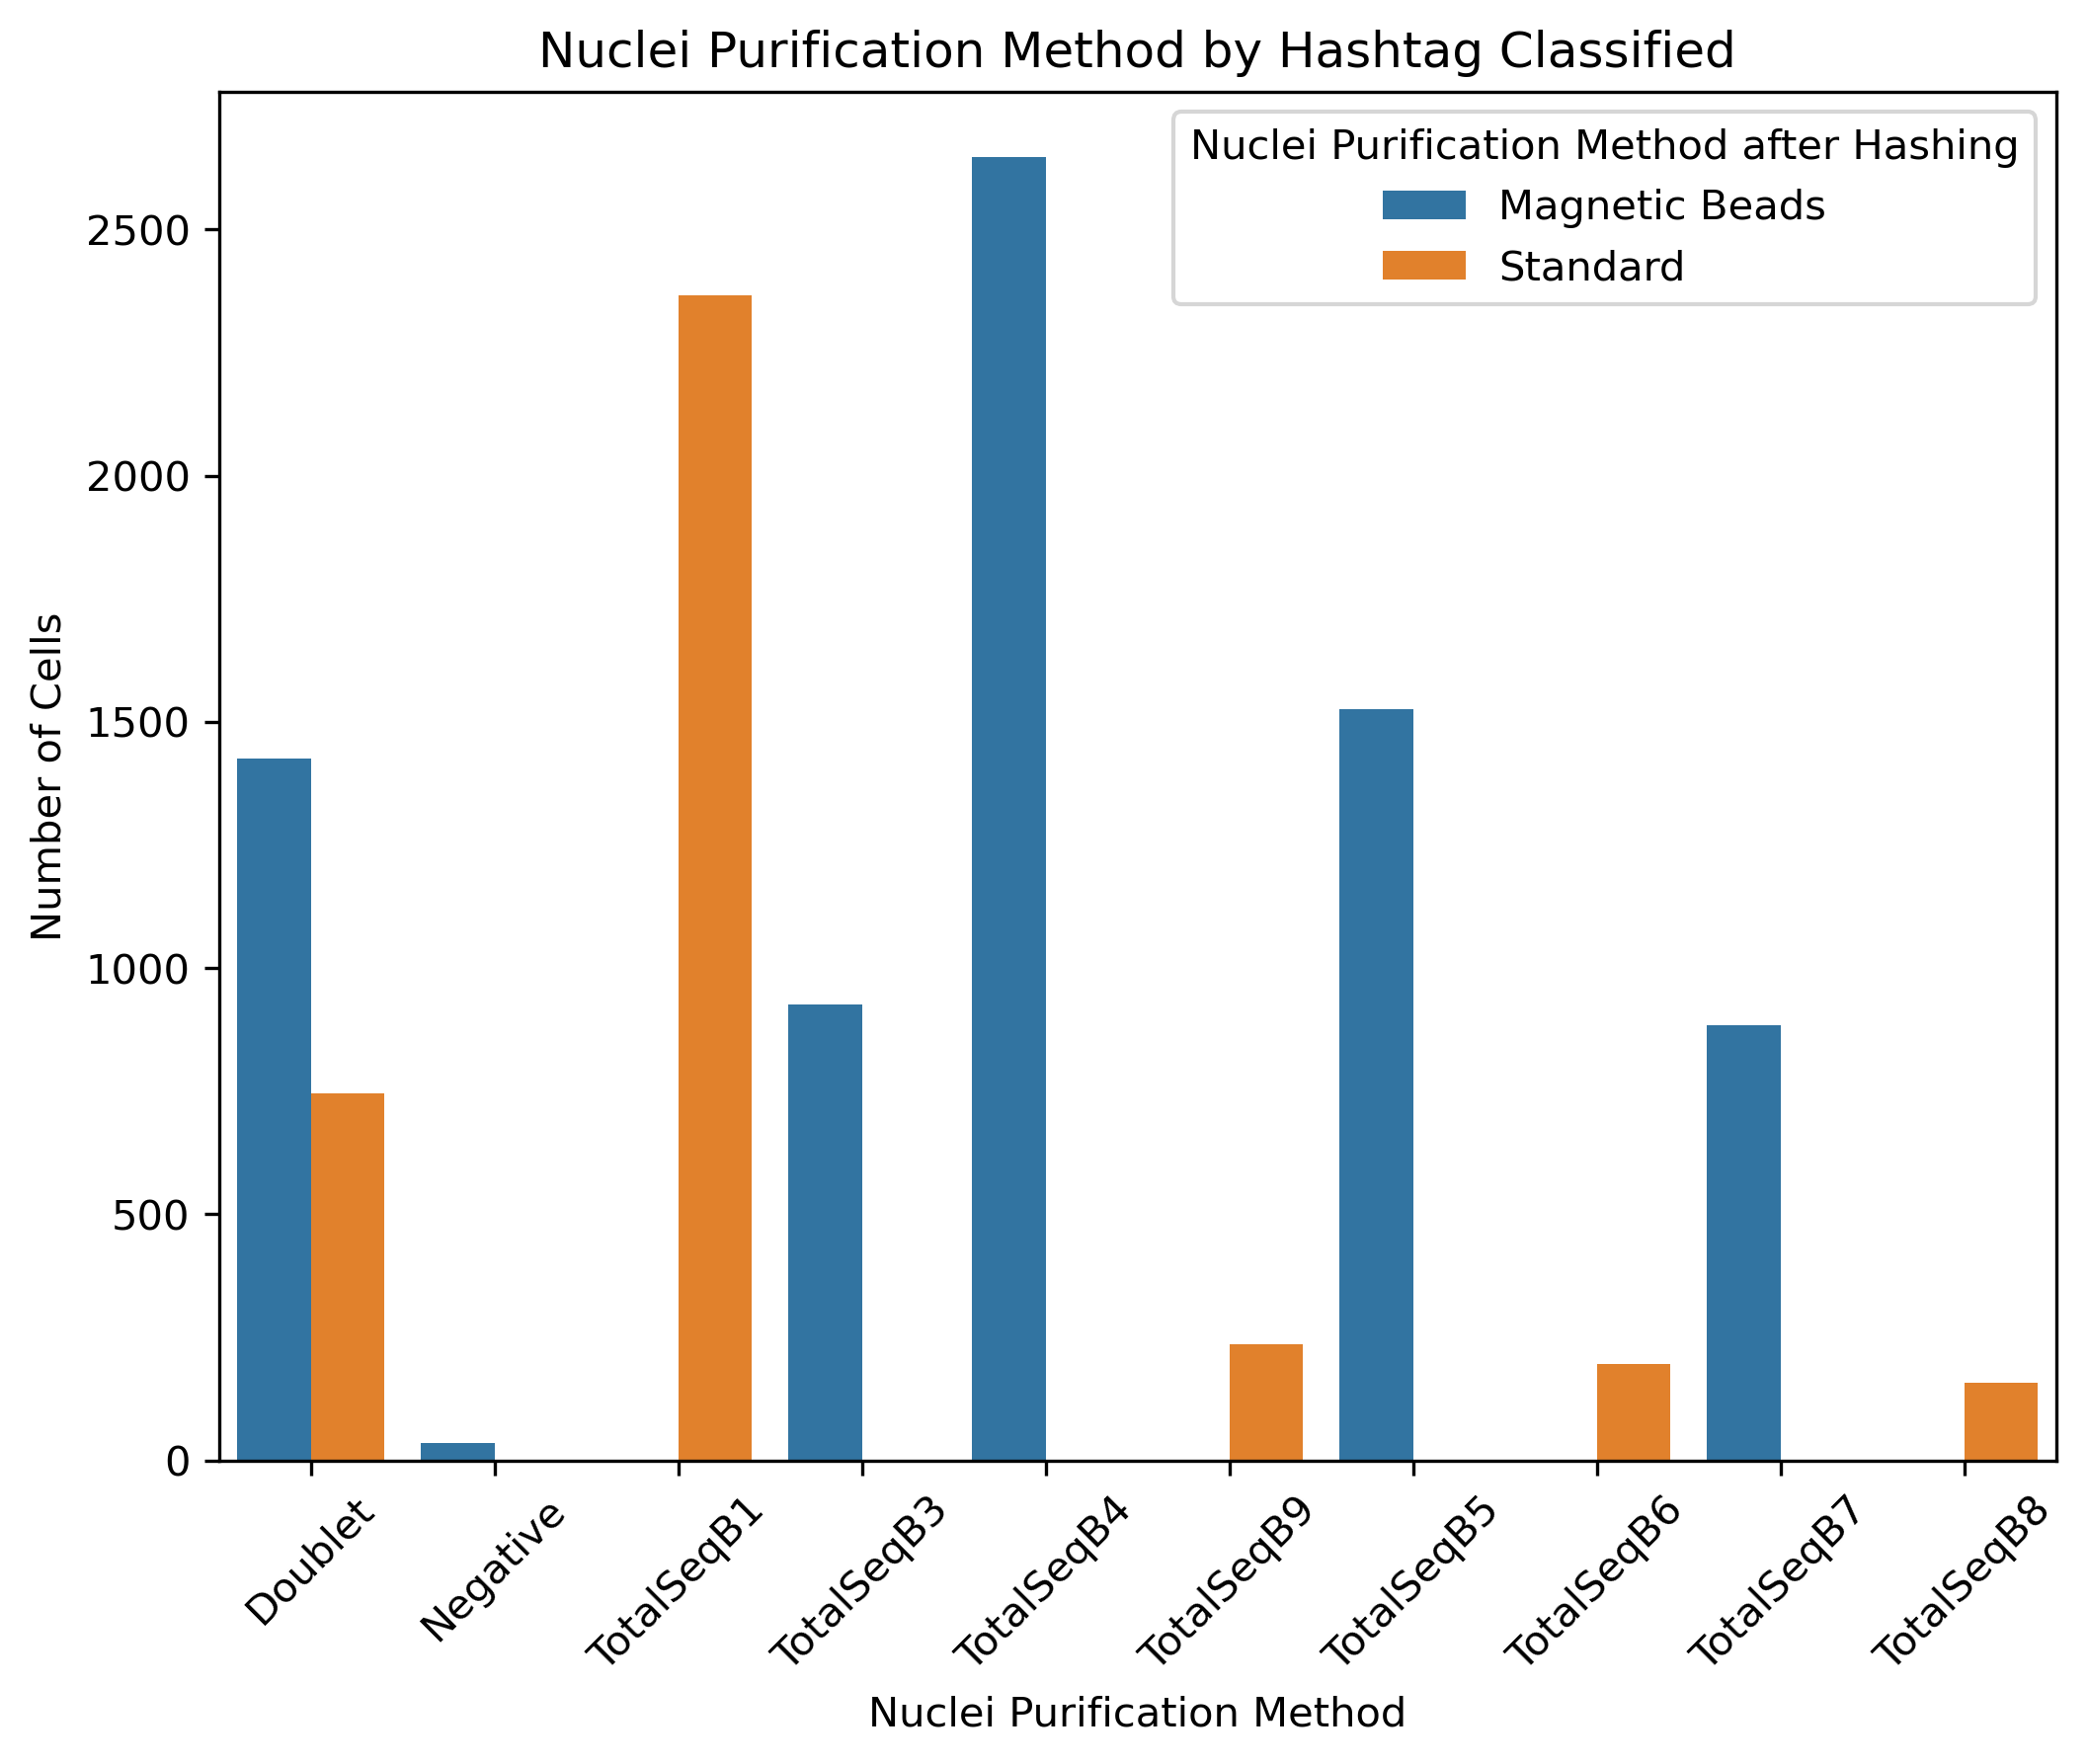

In [44]:
plt.figure(figsize=(8, 6))
sb.countplot(data=filtered_object.obs, hue='Nuclei Purification Method after Hashing', x='Classification', order= ['Doublet','Negative', 'TotalSeqB1','TotalSeqB3','TotalSeqB4','TotalSeqB9','TotalSeqB5','TotalSeqB6','TotalSeqB7','TotalSeqB8'])
plt.title("Nuclei Purification Method by Hashtag Classified")
plt.xlabel("Nuclei Purification Method")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

## Data Export

In [45]:
filtered_object.obs.dtypes

assigned_hashtag                              object
Sample                                        object
Sample-ID                                      int64
Mouse-ID                                      object
Sex                                           object
Group                                         object
Ref hashtag                                   object
Nuclei Purification Method after Hashing      object
n_genes_by_counts                              int32
total_counts                                   int64
total_counts_mt                                int64
pct_counts_mt                                float64
total_counts_ribo                              int64
pct_counts_ribo                              float64
leiden                                      category
TotalSeqB1                                     int64
TotalSeqB3                                     int64
TotalSeqB4                                     int64
TotalSeqB5                                    

In [46]:
filtered_object.write_h5ad(f'../data/demultiplexed_hashsolo_after_cb_0.01_full_{timestamp}.h5ad')